In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist['data'], mnist['target']

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
import matplotlib
import matplotlib.pyplot as plot

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plot.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')

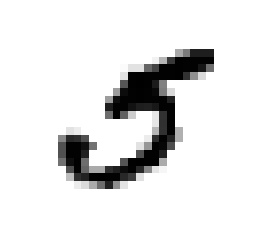

In [6]:
plot.axis('off')
plot.show()

In [7]:
y[36000]

5.0

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.95495,  0.96295,  0.95425])

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565 and 0.96495

0.95495
0.96295
0.95425


In [26]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

In [27]:
never_5_clf = Never5Classifier()

In [28]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.91095,  0.90955,  0.90845])

In [29]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53677,   902],
       [ 1655,  3766]])

In [31]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

NameError: name 'y_train_perfect_predictions' is not defined

In [32]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [60000, 20000]

In [23]:
recall_score(y_train_5, y_train_pred)

0.69470577384246446

In [33]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.74655565467340657

In [34]:
y_scores = sgd_clf.decision_function([some_digit])

In [35]:
y_scores

array([ 4492.59944168])

In [36]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [37]:
y_some_digit_pred

array([ True], dtype=bool)

In [38]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [40]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

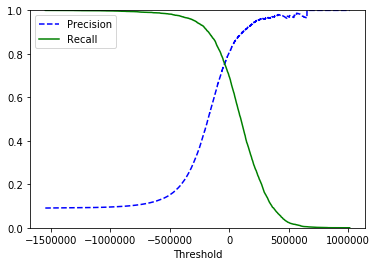

In [45]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plot.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plot.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plot.xlabel("Threshold")
    plot.legend(loc="upper left")
    plot.ylim([0, 1])
    
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plot.show()

In [46]:
y_train_pred_90 = (y_scores > 70000)

In [47]:
precision_score(y_train_5, y_train_pred_90)

0.87510917030567681

In [48]:
recall_score(y_train_5, y_train_pred_90)

0.55451023796347543

In [49]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

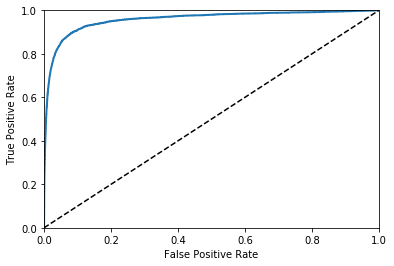

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plot.plot(fpr, tpr, linewidth=2, label=label)
    plot.plot([0,1], [0,1], 'k--')
    plot.axis([0,1,0,1])
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plot.show()

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.95829625531696894